# Сборный проект 

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

**Цель исследования**: выявить закономерности, определяющие успешность игры, для планирования рекламной кампании на предстоящий период.

**Ход исследования**:
1. Изучение и обработка имеющихся данные;
2. Исследовательский анализ данных: оценка продаж по платформам, определение актуального периода, оценка влияния различных факторов на продажу игр;
3. Составление портрета пользователя в зависимости от региона;
4. Статистический анализ и проверка гипотез о равенстве рейтингов различных платформ и различных игровых жанров.

### Обзор данных

Выведем на экран всю информацию, необходимую для первичного ознакомления с данными.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [3]:
data = pd.read_csv('/datasets/games.csv')

In [4]:
data.head() # выводим первые 5 строчек чтобы убедиться, что все верно импортировалось

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info() # основная информация о датафрейме

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 16715 entries, 0 to 16714

Data columns (total 11 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   Name             16713 non-null  object 

 1   Platform         16715 non-null  object 

 2   Year_of_Release  16446 non-null  float64

 3   Genre            16713 non-null  object 

 4   NA_sales         16715 non-null  float64

 5   EU_sales         16715 non-null  float64

 6   JP_sales         16715 non-null  float64

 7   Other_sales      16715 non-null  float64

 8   Critic_Score     8137 non-null   float64

 9   User_Score       10014 non-null  object 

 10  Rating           9949 non-null   object 

dtypes: float64(6), object(5)

memory usage: 1.4+ MB


In [6]:
display(data.isna().sum()) # количество пропущенных значений
display(pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')) # процент пропущенных значений

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Отлично, что ты используешь здесь градиент! Так получается намного нагляднее.

In [7]:
data.describe() # числовое описание датафрейма

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
data.describe(include='object') # построковое описание датафрейма

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


Необходимо:
- привести названия столбцов к нижнему регистру;
- обработать пропуски (удалить или заполнить) в столбцах "Name", "Year_of_Release", "Genre", "Critic_Score", "User_Score", "Rating";
- изменить тип данных в столбцах "Year_of_Release", "Critic_Score", "User_Score";
- провести проверку на явные дубликаты;
- добавить столбец с суммарными данными по всем регионам.

### Предобработка данных

#### Переименование столбцов

Приведем названия столбцов к нижнему регистру.

In [9]:
data.columns = data.columns.str.lower()

In [10]:
data.head() # проверим, что все столбцы переименовались

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Обработка пропущенных значений

Удалим строки с пропусками в столбцах "name" и "genre". В каждом из столбцов всего по 5 пропуска, удаление этих строк не является значительной потерей данных.

In [11]:
data = data.dropna(subset=['name', 'genre']).reset_index(drop=True)

В столбце "year_of_release" пропущено 269 значений, что составляет ~2% от всего датафрейма, что дает возможность удалить строки с пропусками в этом столбце без значительной потери данных. К тому же, логично заполнить пропуски в данном столбце, кроме как вручную, не представляется возможным.

In [12]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

В столбцах "critic_score", "user_score", "rating" пропущено более 40% значений - удалить строки с пропусками нельзя.

Пропуски в столбцах "critic_score" и "user_score" заменим значением по умолчанию '-1'.

In [13]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)

В столбце "user_score" также встречается значение 'tbd', что, согласно информации с сайта Metacritic, означает "To be determined" - "Будет определено". Сервис оставляет значение 'tbd' в тех случаях, когда отзывов пользователей слишком мало для выставления оценки. Будет логично также заменить эти значения на значение по умолчанию '-1', т.к. по сути 'tbd' означает отсутствие рейтинга и его можно приравнять к пропущенному значению.

In [14]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = '-1'

Пропуски в столбце "rating" можно заменить значением по умолчанию 'no rating'.

In [15]:
data['rating'] = data['rating'].fillna('no rating')

Выведем на экран список уникальных значений столбца 'rating' и их количество.

In [16]:
data['rating'].value_counts(dropna=False)

no rating    6676
E            3921
T            2905
M            1536
E10+         1393
EC              8
K-A             3
AO              1
RP              1
Name: rating, dtype: int64

Рейтинг K-A ('Kids to Adult') - это первоначальное обозначение рейтинга E ('Everyone'), поэтому значение 'K-A' в столбце "rating" можно заменить на 'E'.
Остальные значения рейтингов и относящиеся к ним группы можно удалить, т.к. не совсем правильно будет объединять их с другими, более многочисленными рейтингами, но и группа игр с этими рейтингами нерепрезентативна (в дальнейшем необходимо будет оценить влияние рейтинга ESRB на продажи по регионам).

In [17]:
data['rating'] = data['rating'].replace({'K-A':'E'})

In [18]:
data = data.query('rating not in ["EC", "RP", "AO"]').reset_index(drop=True)

#### Изменение типов данных

Необходимо изменить типы данных в столбцах:
- year_of_release - на int, т.к. в столбце содержится год релиза игры (без дня и месяца), год может быть обозначен только целым числом, начальный тип данных - float;
- critic_score - на int, т.к. оценки критиков являются целочисленными значениями по 100-балльной шкале, начальный тип данных - float;
- user_score - на float, оценки пользователей являются дробными числами от 0 до 10, но из-за значения 'tbd' начальный тип данных в столбце - object.

In [19]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['critic_score'] = data['critic_score'].astype('int')
data['user_score'] = data['user_score'].astype('float')

#### Проверка на явные дубликаты

In [20]:
data.duplicated().sum()

0

Явные дубликаты в датафрейме не обнаружены.

#### Добавление столбца

Добавим в таблицу столбец "total_sales", в котором будет храниться общая сумма продаж по всем регионам.

In [21]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [22]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,no rating,31.38


#### Результаты предобработки

In [23]:
data.info() # проверим изменение типов данных и добавление столбца

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 16434 entries, 0 to 16433

Data columns (total 12 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   name             16434 non-null  object 

 1   platform         16434 non-null  object 

 2   year_of_release  16434 non-null  int64  

 3   genre            16434 non-null  object 

 4   na_sales         16434 non-null  float64

 5   eu_sales         16434 non-null  float64

 6   jp_sales         16434 non-null  float64

 7   other_sales      16434 non-null  float64

 8   critic_score     16434 non-null  int64  

 9   user_score       16434 non-null  float64

 10  rating           16434 non-null  object 

 11  total_sales      16434 non-null  float64

dtypes: float64(6), int64(2), object(4)

memory usage: 1.5+ MB


In [24]:
data.isna().sum() # проверим результат заполнения пропусков

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

In [25]:
data.describe() # числовое описание датафрейма

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16434.000000,16434.000000,16434.000000,16434.000000,16434.00000,16434.000000,16434.000000,16434.000000
mean,2006.484970,0.264003,0.145974,0.078535,0.04761,32.990933,2.688779,0.536121
std,5.876779,0.818581,0.506848,0.311189,0.18806,36.302474,4.170184,1.559197
min,1980.000000,0.000000,0.000000,0.000000,0.00000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.00000,-1.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.01000,-1.000000,-1.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.03000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.57000,98.000000,9.700000,82.540000


In [26]:
data.describe(include='object') # построковое описание датафрейма

,name,platform,genre,rating
count,16434,16434,16434,16434
unique,11422,31,12,5
top,Need for Speed: Most Wanted,PS2,Action,no rating
freq,12,2126,3305,6676


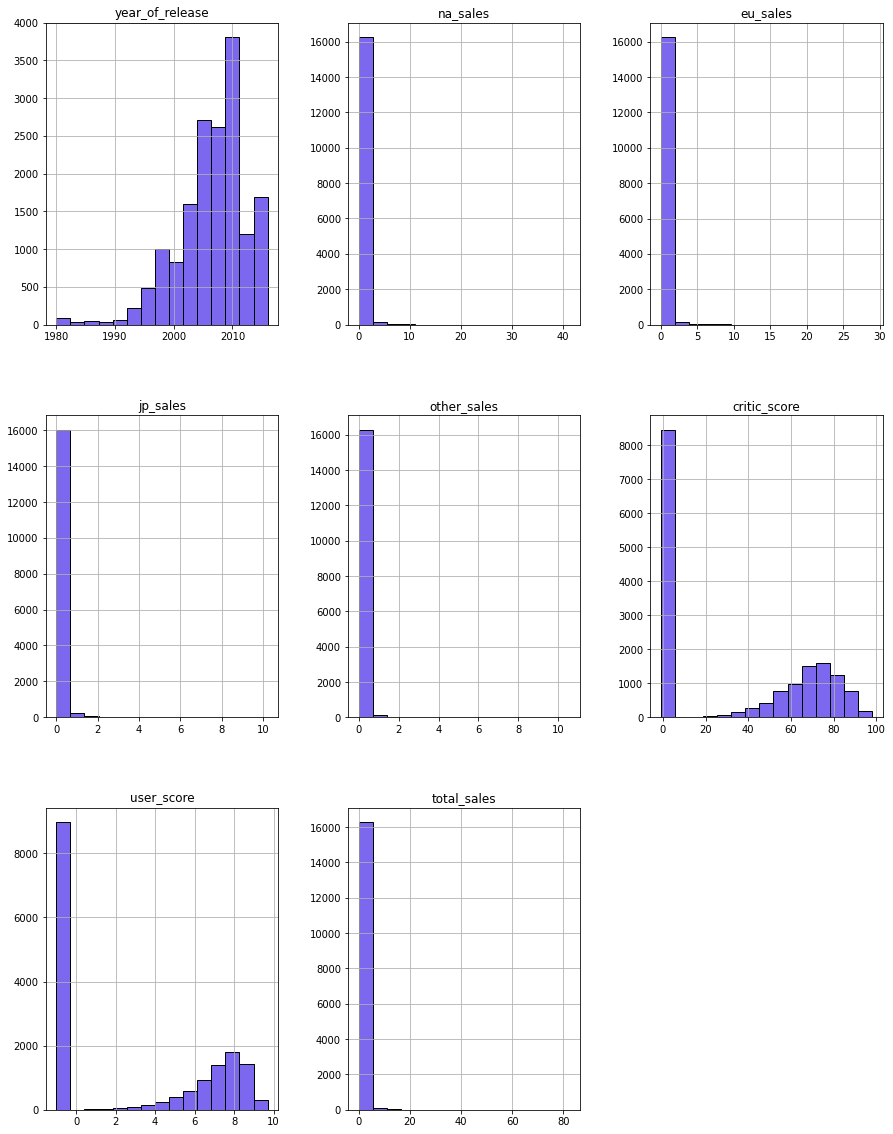

In [27]:
data.hist(bins=15, figsize=(15, 20), color='#7B68EE', edgecolor='black');

__Вывод__

В результате предобработки данных мной была удалена 281 строка, что составляет менее 2 процентов от общего объема исходного датафрейма (16715 строк). Количество оставшихся в таблице объектов - 16434.

Были удалены строки с пропусками в столбцах "name", "genre", "year_of_release", а также были удалены игры, относящиеся в малочисленным рейтинговым подгруппам (EC, RP, AO). Пропуски в столбцах "critic_score", "user_score", "rating" были заменены значениями по умолчанию, т.к. доля пропущенных значений от общего количества значений составила более 40% в каждом столбце. Удаление этих пропусков привело бы к потере значительной доли данных и сильно затруднило бы дальнейший анализ.

### Исследовательский анализ данных

На данном этапе необходимо:
1. Оценить выпуск игр по годам;
2. Оценить продажи по платформам;
3. Выбрать актуальный период;
4. Отобрать потенциально прибыльные платформы;
5. Изучить влияние отзывов на продажи внутри одной платформы;
6. Определить самые продаваемые жанры.

#### Выпуск игр в разные года

Для оценки объемов выпуска игр в разные года построим график.

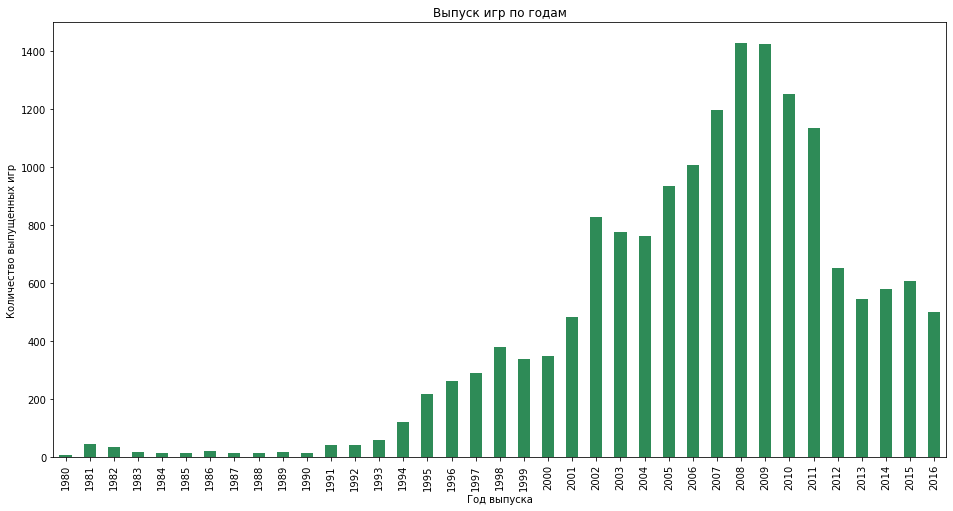

In [28]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count')\
    .plot(kind='bar', color='#2E8B57', figsize=(16, 8), legend=None)
plt.title('Выпуск игр по годам')
plt.ylabel('Количество выпущенных игр')
plt.xlabel('Год выпуска')
plt.show()

По графику видно, что индустрия видеоигр начала набирать обороты с середины 90-х годов 20 века. Пиковое значение приходится на 2008-2009 годы - суммарно более 2800 видеоигр для различных платформ было выпущено в эти годы. Спад производства видеоигр, пришедший на смену резкому росту, может быть последствием глобального финансового кризиса конца нулевых годов.

#### Продажи игр по платформам

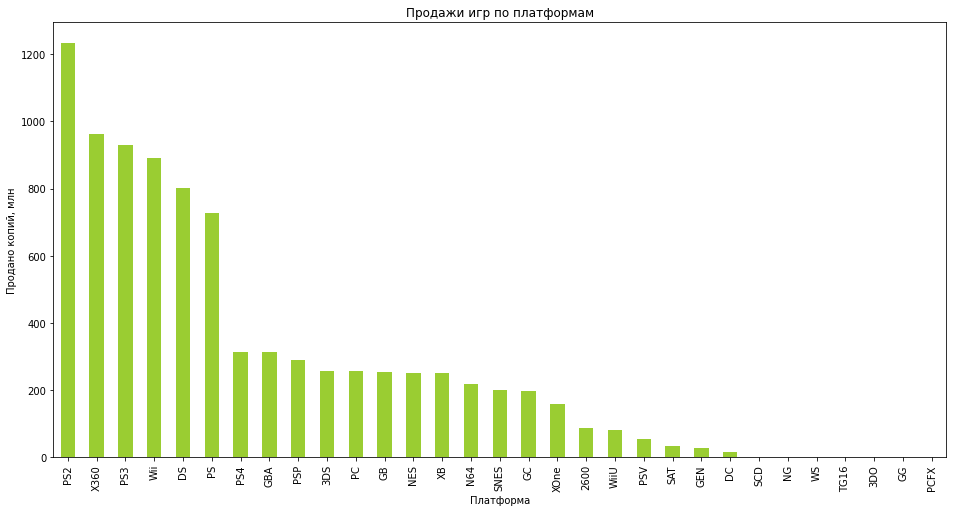

In [28]:
top_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)
top_platforms.plot(kind='bar', color='#9ACD32', figsize=(16, 8), legend=None)
plt.title('Продажи игр по платформам')
plt.ylabel('Продано копий, млн')
plt.xlabel('Платформа')
plt.show()

Больше всего игр (более 1.2 млрд копий) было продано для платформы PlayStation 2. С большим отставанием, но все же в топ также входят: Xbox 360, PlayStation 3, Wii и DS от Nintento. 

X360, PS3, Wii и DS относятся к одному временному промежутку - все они вышли в 2004-2006 годах. PS2 была выпущена несколько раньше - в 2000 году.

Рассмотрим распределение продаж по годам внутри каждой из топ-5 платформ.

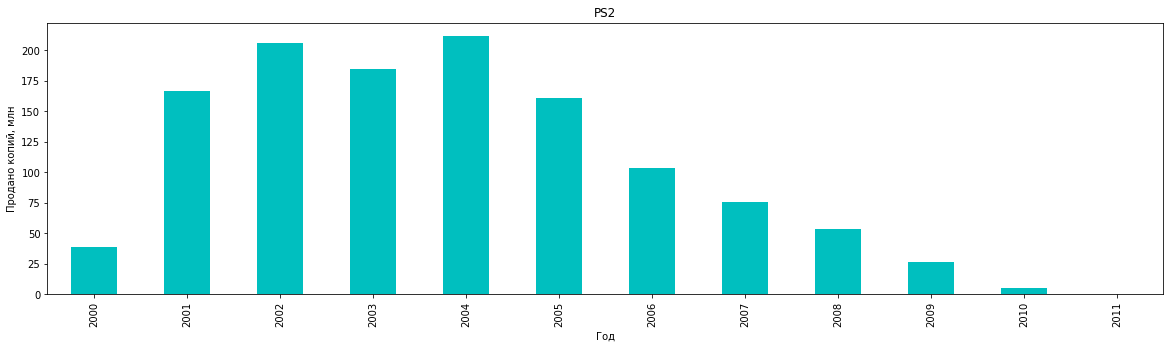

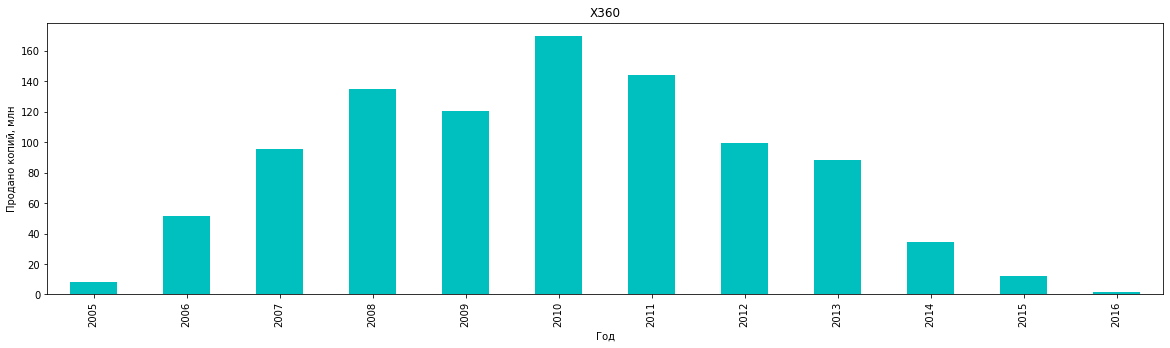

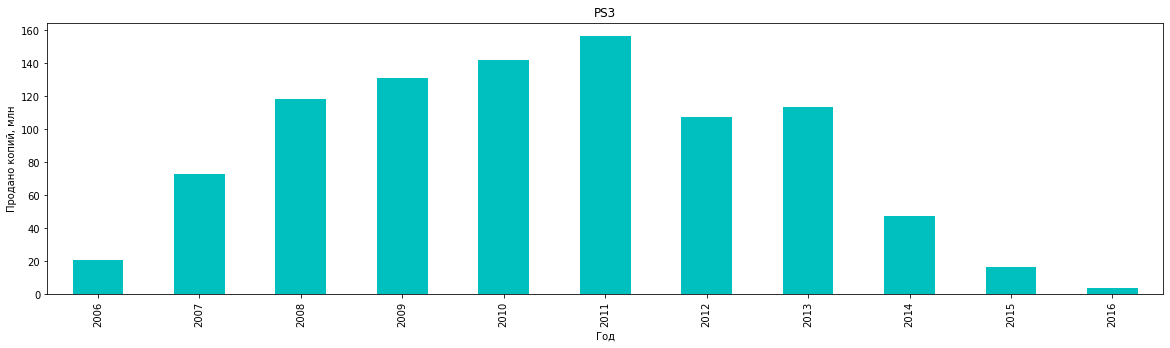

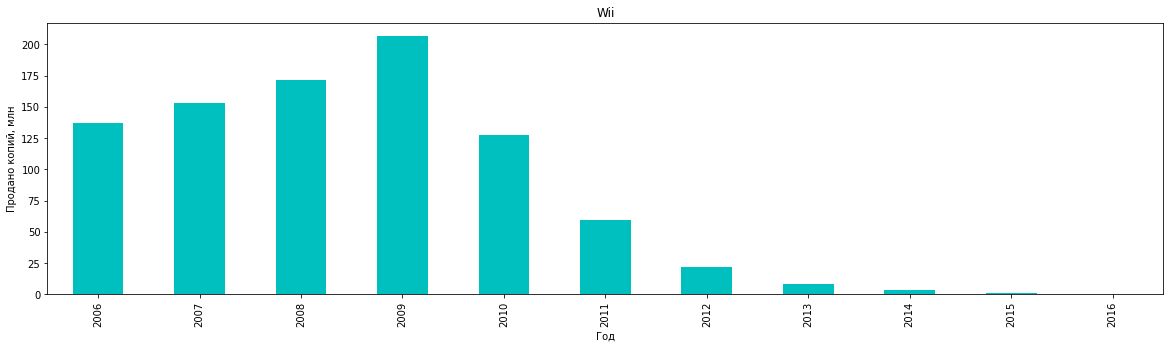

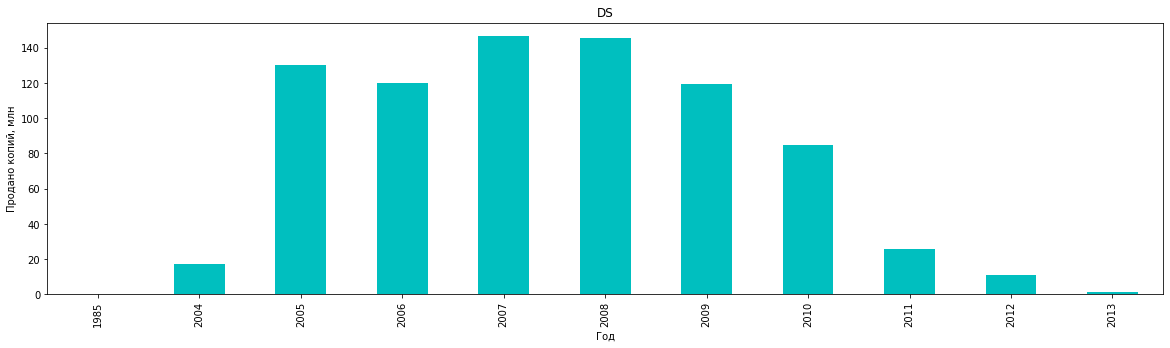

In [29]:
for platform in (top_platforms.head(5).reset_index())['platform'].unique():
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(kind='bar', figsize=(20,5), color='c', legend=None)

    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Продано копий, млн')
    plt.show()

На графике продаж игр для консоли Nintendo DS наблюдается выброс - продажа игр в 1985 году при выходе консоли в 2004 году. Необходимо удалить данный выброс и построить новый график.

In [30]:
data.query('platform == "DS" & year_of_release < 2004').index # найдем индекс интересующей нас строки

Int64Index([15694], dtype='int64')

In [31]:
data = data.drop([15694]).reset_index(drop=True)

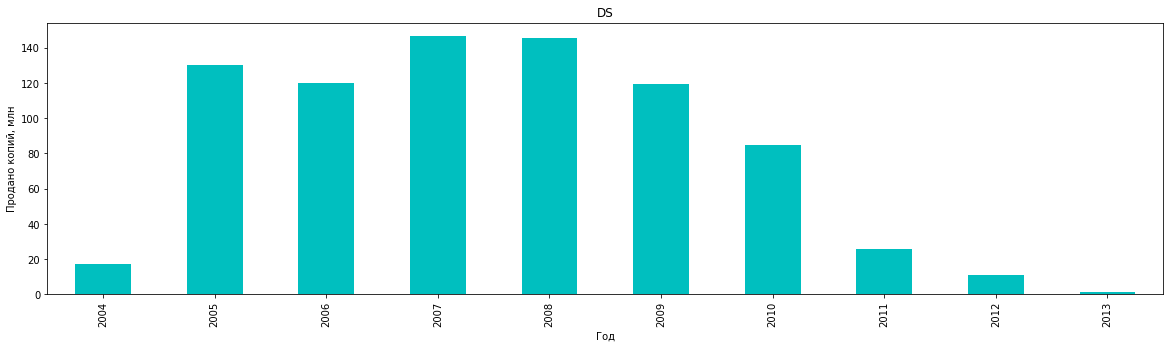

In [32]:
data[data['platform'] == 'DS'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', figsize=(20,5), color='c', legend=None)
plt.title(platform)
plt.xlabel('Год')
plt.ylabel('Продано копий, млн')
plt.show()

Из всех пяти графиков видно, что игры для платформ продаются в течение 10-12 лет с момента выхода платформы, но наиболее популярными они остаются лишь в течение 5 лет. На основе этого можно выделить __актуальный период__, подходящий для данного исследования - _с 2013 года_. По моему мнению, данные с 2013 по 2016 годы помогут построить прогноз для 2017 года наиболее точно.

In [33]:
actual_data = data.query('year_of_release >= 2013') # создаем новый датафрейм с данными за актуальный период

Построим график глобальных продаж по платформам в актуальном периоде, чтобы выделить самые прибыльные.

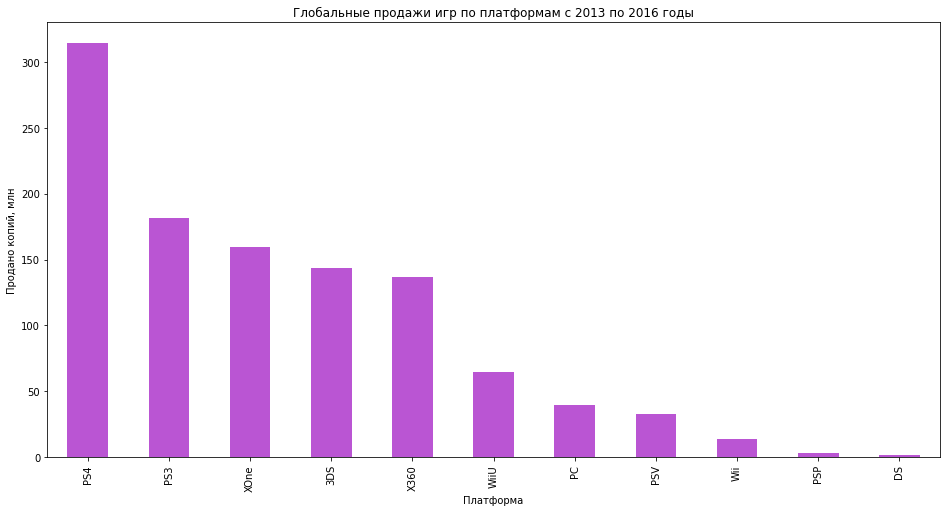

In [34]:
actual_top = actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)
actual_top.plot(kind='bar', color='#BA55D3', figsize=(16, 8), legend=None)
plt.title('Глобальные продажи игр по платформам с 2013 по 2016 годы')
plt.ylabel('Продано копий, млн')
plt.xlabel('Платформа')
plt.show()

В 2013-2016 годах лидером по продажам игр является PlayStation 4. В топ-5 входят также: PlayStation 3, Xbox One, Nintendo 3DS и Xbox 360.

Посмотрим распределение продаж внутри каждой платформы.

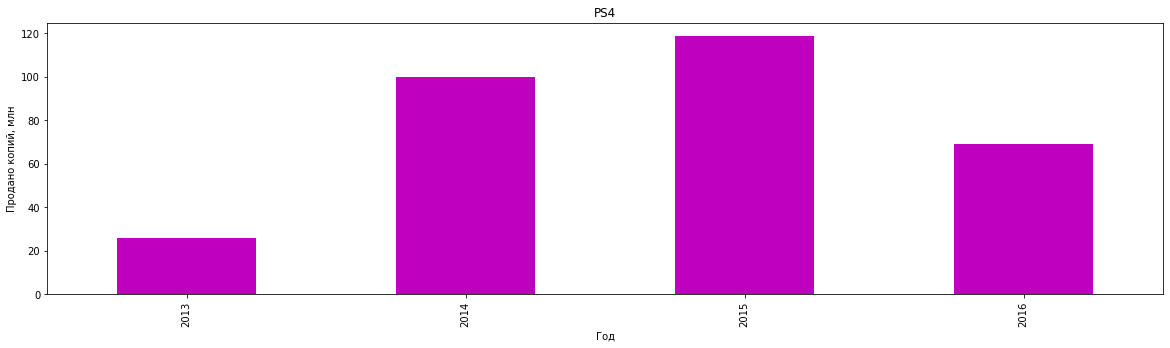

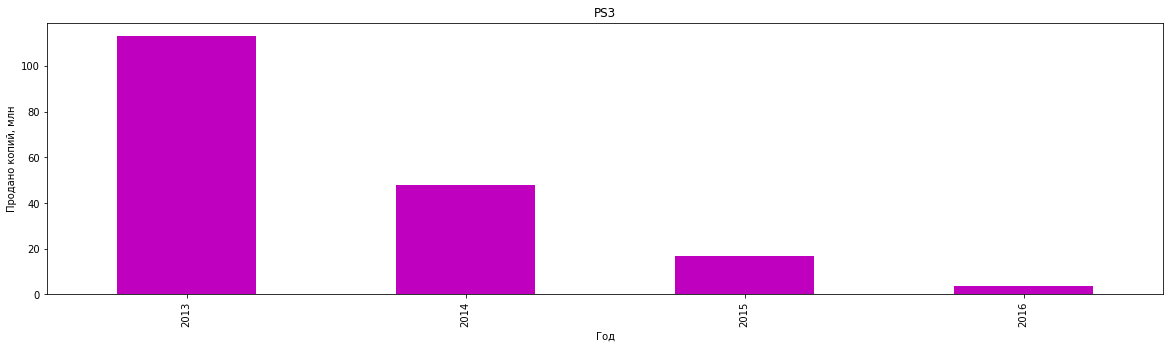

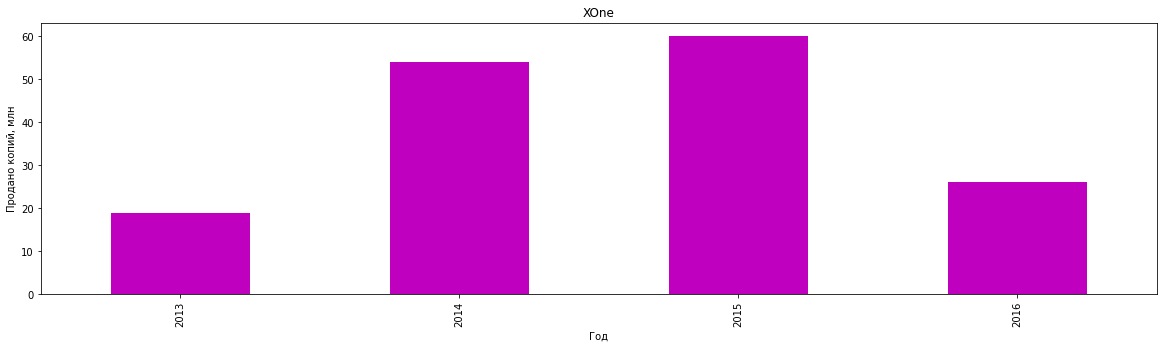

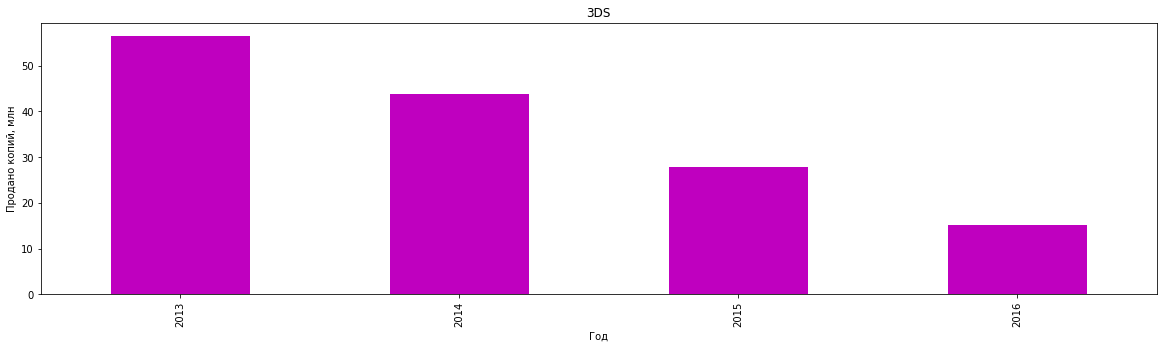

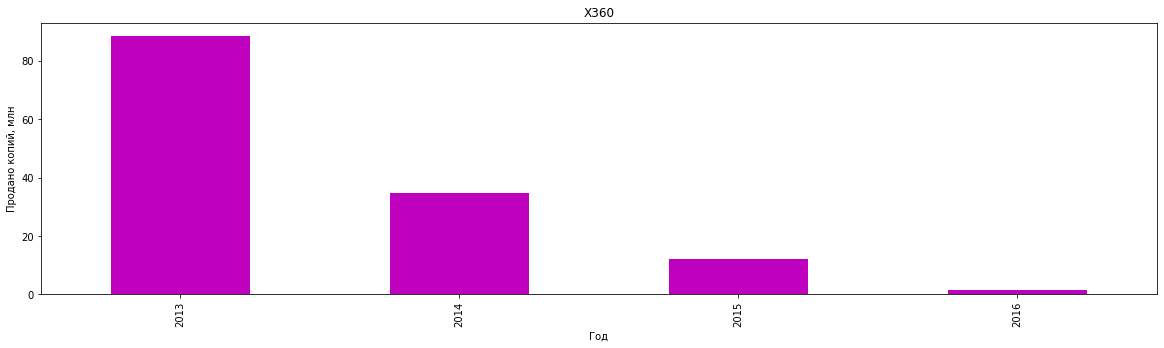

In [35]:
for platform in (actual_top.head(5).reset_index())['platform'].unique():
    actual_data[actual_data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .plot(kind='bar', figsize=(20,5), color='m', legend=None)

    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Продано копий, млн')
    plt.show()

Судя по распределению продаж внутри платформ в актуальном периоде, количество игр, проданных для платформ Xbox 360, Nintendo 3DS и PlayStation 3, с каждым годом все сильнее снижается, поэтому данные платформы не стоит рассматривать как потенциально прибыльные в 2017 году. 

Если принять во внимание тенденцию, выявленную на прошлом шаге анализа (платформы находятся на пике популярности в течение 5 лет), то можно предположить, что в 2017 году платформы PS4 и XOne останутся наиболее прибыльными среди остальных.

Построим диаграмму размаха для продаж по всем платформам внутри актуального периода.

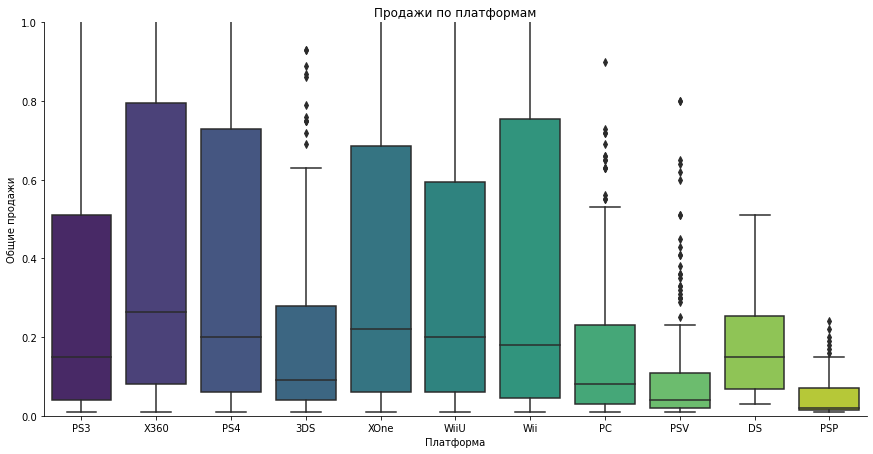

In [36]:
sns.catplot(x='platform', y='total_sales', kind='box', data=actual_data, orient='v', height=6, aspect=2, palette='viridis')
plt.title('Продажи по платформам')
plt.ylabel('Общие продажи')
plt.xlabel('Платформа')
plot = plt.ylim(0, 1)

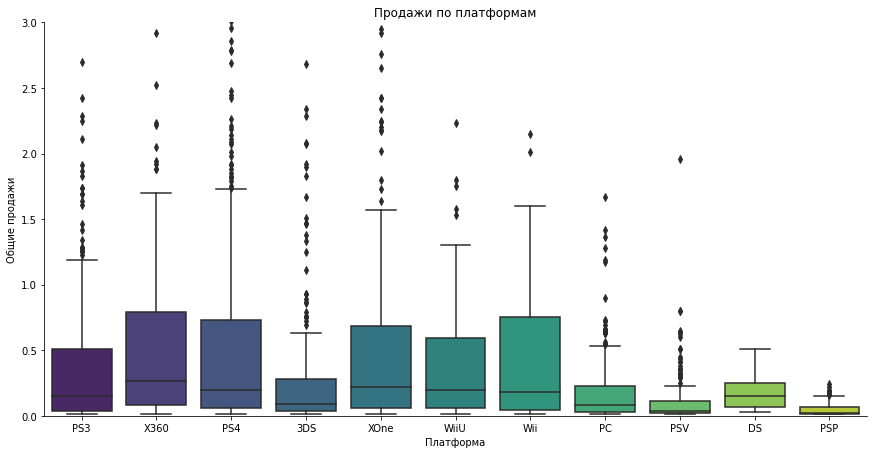

In [37]:
sns.catplot(x='platform', y='total_sales', kind='box', data=actual_data, orient='v', height=6, aspect=2, palette='viridis')
plt.title('Продажи по платформам')
plt.ylabel('Общие продажи')
plt.xlabel('Платформа')
plot = plt.ylim(0, 3)

Глядя на диаграмму, можно сделать вывод, что на платформах выходит большое количество игр с не очень высокими продажами, за счет чего растут общие продажи внутри платформы.

#### Влияние отзывов на продажи

Определим влияние отзывов критиков и покупателей на продажи игр внутри самой популярной платформы актуального периода - PlayStation 4.
Для этого построим диаграммы рассеяния и посчитаем коэффициент корреляции Пирсона.

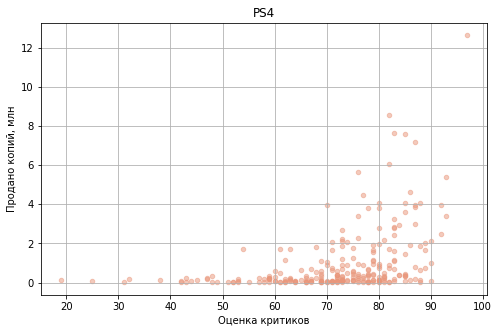

Коэффициент корреляции: 0.40589480145836687


In [38]:
ps4 = actual_data.query('platform == "PS4"').query('critic_score != -1 & user_score != -1')

ps4.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, color='#E9967A', alpha=0.5, figsize=(8, 5))
plt.title('PS4')
plt.ylabel('Продано копий, млн')
plt.xlabel('Оценка критиков')
plt.show()

print('Коэффициент корреляции:', ps4['total_sales'].corr(ps4['critic_score']))

Корреляционная связь между продажами и оценками критиков - прямая средняя. 

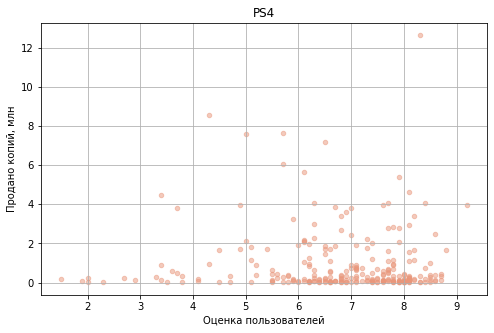

Коэффициент корреляции: -0.03362497596528878


In [39]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', grid=True, color='#E9967A', alpha=0.5, figsize=(8, 5))
plt.title('PS4')
plt.ylabel('Продано копий, млн')
plt.xlabel('Оценка пользователей')
plt.show()

print('Коэффициент корреляции:', ps4['total_sales'].corr(ps4['user_score'])) 

Корреляционная связь между продажами и оценками критиков отсутствует.

In [40]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,no rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,no rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


In [41]:
platform = ['PS3', 'X360', 'XOne', '3DS']



PS3:


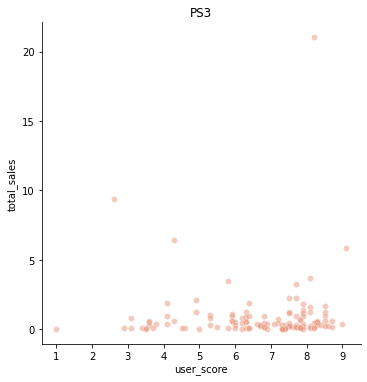

Коэффициент корреляции user_score и total_sales: 0.02269094327112414


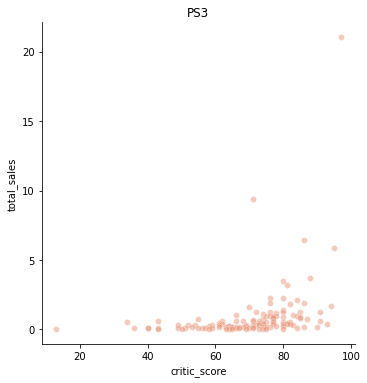

Коэффициент корреляции critic_score и total_sales: 0.33380663565061736



X360:


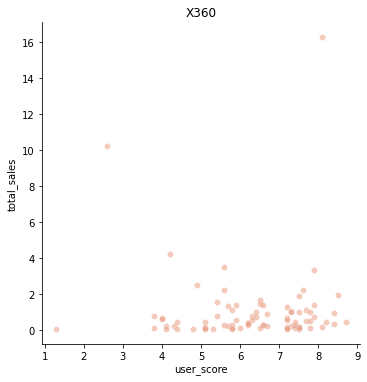

Коэффициент корреляции user_score и total_sales: -0.006238179532306317


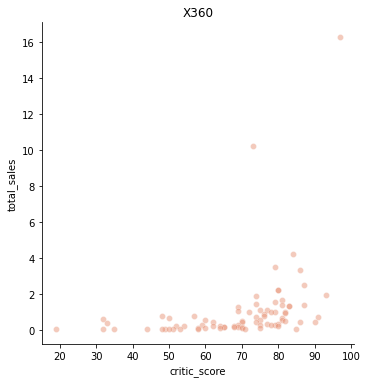

Коэффициент корреляции critic_score и total_sales: 0.3503445460228664



XOne:


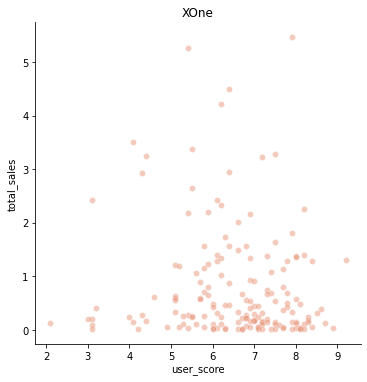

Коэффициент корреляции user_score и total_sales: -0.09400318326920852


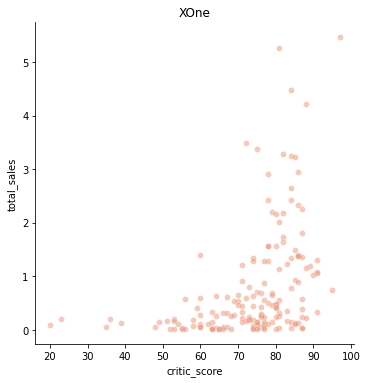

Коэффициент корреляции critic_score и total_sales: 0.41042203561296375



3DS:


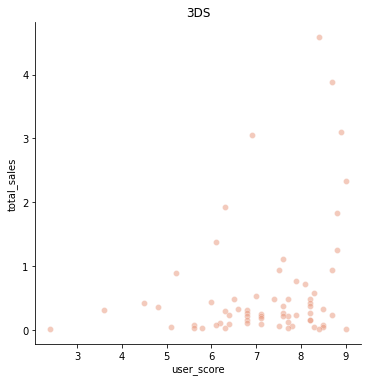

Коэффициент корреляции user_score и total_sales: 0.2729904366942444


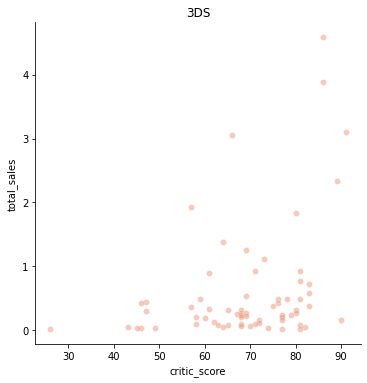

Коэффициент корреляции critic_score и total_sales: 0.3392349287853147


In [42]:
for platform in ['PS3', 'X360', 'XOne', '3DS']:
    print('\n{0}:'.format(platform))
    for column in ['user_score', 'critic_score']:
        temp = actual_data.query('platform == @platform and user_score >= 0 and critic_score >= 0')
        sns.relplot(x=column, y='total_sales', data=temp, color='#E9967A', alpha=0.5)
        plt.title(platform)
        plt.show()
        print('Коэффициент корреляции {0} и total_sales: {1}'.format(column, (temp[column]).corr(temp['total_sales'])))

По всем платформам, кроме 3DS, корреляционная связь между оценками пользователей и продажами отсутствует. Корреляция между оценками пользователей и продажами по платформе 3DS - прямая слабая.

Корреляционная связь между оценками критиков и продажами на всех платформах - прямая слабая.

#### Распределение продаж по жанрам игр

In [43]:
genre = actual_data.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'median'])
genre.columns = ['total sales', 'median sales']

In [44]:
genre.sort_values(by='median sales', ascending=False)

,total sales,median sales
genre,,
Shooter,232.98,0.450
Sports,150.65,0.240
Platform,42.63,0.225
Role-Playing,145.89,0.125
Fighting,35.31,0.125
Racing,39.89,0.120
Action,321.87,0.110
Simulation,21.76,0.100
Misc,62.82,0.100


По общему количеству продаж выигрывает жанр _Экшн_ , но самое высокое медианное значение - у _Шутеров_. Можно предположить, что игры данного жанра более стабильно приносят доход своим авторам.

К жанрам с низкими продажами можно отнести стратегии, паззлы и приключенческие игры.

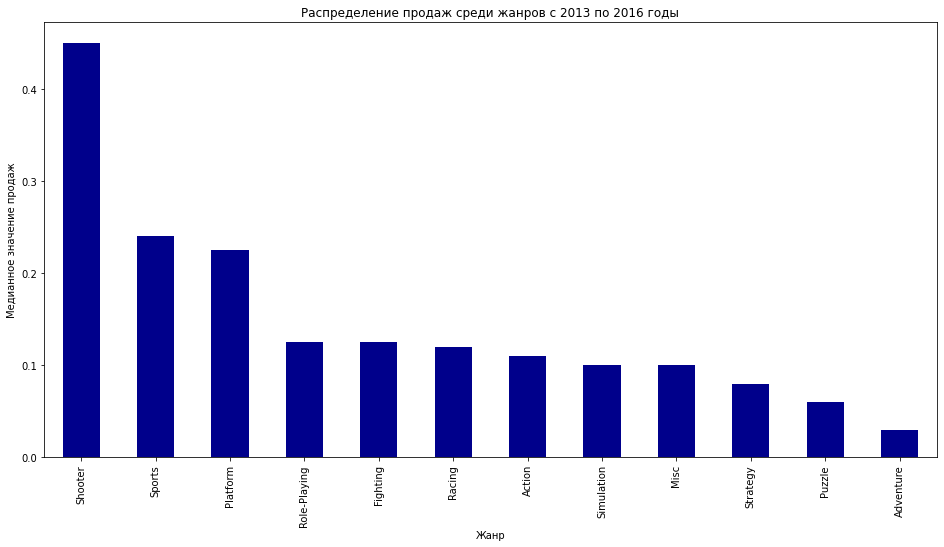

In [45]:
genre.sort_values(by='median sales', ascending=False).plot(y='median sales',\
                                                           kind='bar', color='#00008B', figsize=(16, 8), legend=None)
plt.title('Распределение продаж среди жанров с 2013 по 2016 годы')
plt.ylabel('Медианное значение продаж')
plt.xlabel('Жанр')
plt.show()

__Вывод__

Индустрия видеоигр начала активно развиваться в середине девяностых годов 20-го века и достигла пика по количеству выпускаемых игр к концу нулевых.

Среднее время жизни одной платформы - примерно 10 лет, при этом наиболее популярной она остается в среднем около 5 лет.

Шутеры можно считать наиболее стабильно прибыльными играми, несмотря на то, что в абсолютном значении их общее количество продаж за актуальный период (2013-2016 гг) ниже, чем у игр жанра Экшн.

Из всех представленных платформ в 2017 году, вероятно, самыми популярными будут PlayStation 4 и Xbox One.

### Портрет пользователя по регионам

Чтобы определить портрет пользователя по региону, проанализируем топ-5 популярных платформ и популярных жанров игр в различных регионах, а также оценим влияние рейтингов ESRB на продажи в каждом регионе.

In [46]:
#определим топ-5 популярным платформ в каждом регионе
region = ['na_sales', 'eu_sales', 'jp_sales']
for reg in region:
    region_sales = actual_data.pivot_table(index='platform', values=reg , aggfunc='sum').sort_values(by=reg, ascending=False)
    region_sales.index.names = ['Платформа']
    display(region_sales.head())

,na_sales
Платформа,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


,eu_sales
Платформа,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


,jp_sales
Платформа,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


Из таблиц видно, что ситуация на рынках Европы и Северной Америки очень похожа - в топ-5 входят одни и те же платформы, и на первом месте по общим продажам внутри региона занимает PlayStation 4. 

На рынке Японии ситуация противоположная: на первом месте - консоль Nintendo 3DS, которая на рынках Европы и Северной Америки занимает 5 место, и  в топ-5 не входят консоли Xbox360 и XboxOne, выпускаемые американской компанией Microsoft. Японские пользователи отдают предпочтением платформам от местных компаний Nintendo и Sony.

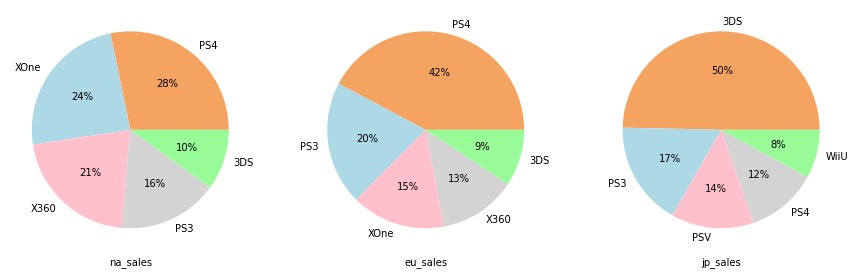

In [47]:
#построим для наглядности круговые диаграммы

plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.2)

serial_number = 1

for reg in region:
    ax = plt.subplot(3, 3, serial_number)
    region_sales = actual_data.pivot_table(index='platform', values=reg , aggfunc='sum').sort_values(by=reg, ascending=False)
    region_sales.head().plot(kind='pie', ax=ax, subplots=True, legend=None, autopct='%1.0f%%',\
                            colors = ['#F4A460', '#ADD8E6', '#FFC0CB', '#D3D3D3', '#98FB98'])
    plt.xlabel(reg)
    plt.ylabel(None)
    serial_number += 1

На круговых диаграммах видно, как распределяются продажи внутри топ-5 платформ в каждом регионе в актуальном периоде.

Рассмотрим также распределение популярных жанров игр в разных регионах.

In [48]:
for reg in region:
    region_genres = actual_data.pivot_table(index='genre', values=reg , aggfunc='sum').sort_values(by=reg, ascending=False)
    region_genres.index.names = ['Жанр']
    display(region_genres.head())

,na_sales
Жанр,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


,eu_sales
Жанр,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


,jp_sales
Жанр,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


В топ-5 по всем регионам вошли жанры Action, Shooter и Role-Playing. В Северной Америке и Европе также популярны спортивные видео игры, а в Японии - Fighting и игры, не вошедшие ни в один из предложенных жанров (Misc).

Но распределение позиций в топе в Японии разительно отличается от западных регионов, где на первом месте по продажам ролевые видеоигры.

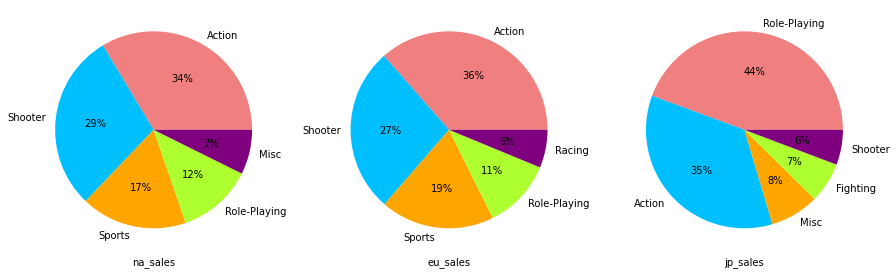

In [49]:
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.2)

serial_number = 1

for reg in region:
    ax = plt.subplot(3, 3, serial_number)
    region_genres = actual_data.pivot_table(index='genre', values=reg , aggfunc='sum').sort_values(by=reg, ascending=False)
    region_genres.head().plot(kind='pie', ax=ax, subplots=True, legend=None, autopct='%1.0f%%',\
                            colors=['#F08080', '#00BFFF', '#FFA500', '#ADFF2F', '#7F007F'])
    plt.xlabel(reg)
    plt.ylabel(None)
    serial_number += 1

Процентное соотношение продаж между жанрами в Северной Америке и Европе примерно одинаковое. В Японии продажи игр жанра Action занимают такой же процент от всех продаж в топ-5, как и в других регионах, но при этом ролевые видеоигры более популярны - 44% от продаж в топ-5.

Нужно также оценить влияние рейтингов ESRB на продажи в каждом регионе.

In [50]:
for reg in region:
    region_rating = actual_data.pivot_table(index='rating', values=reg , aggfunc='sum').sort_values(by=reg, ascending=False)
    region_rating.index.names = ['Рейтинг ESRB']
    display(region_rating.head())

,na_sales
Рейтинг ESRB,
M,165.21
no rating,89.42
E,79.05
E10+,54.24
T,49.79


,eu_sales
Рейтинг ESRB,
M,145.32
E,83.36
no rating,78.91
E10+,42.69
T,41.95


,jp_sales
Рейтинг ESRB,
no rating,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


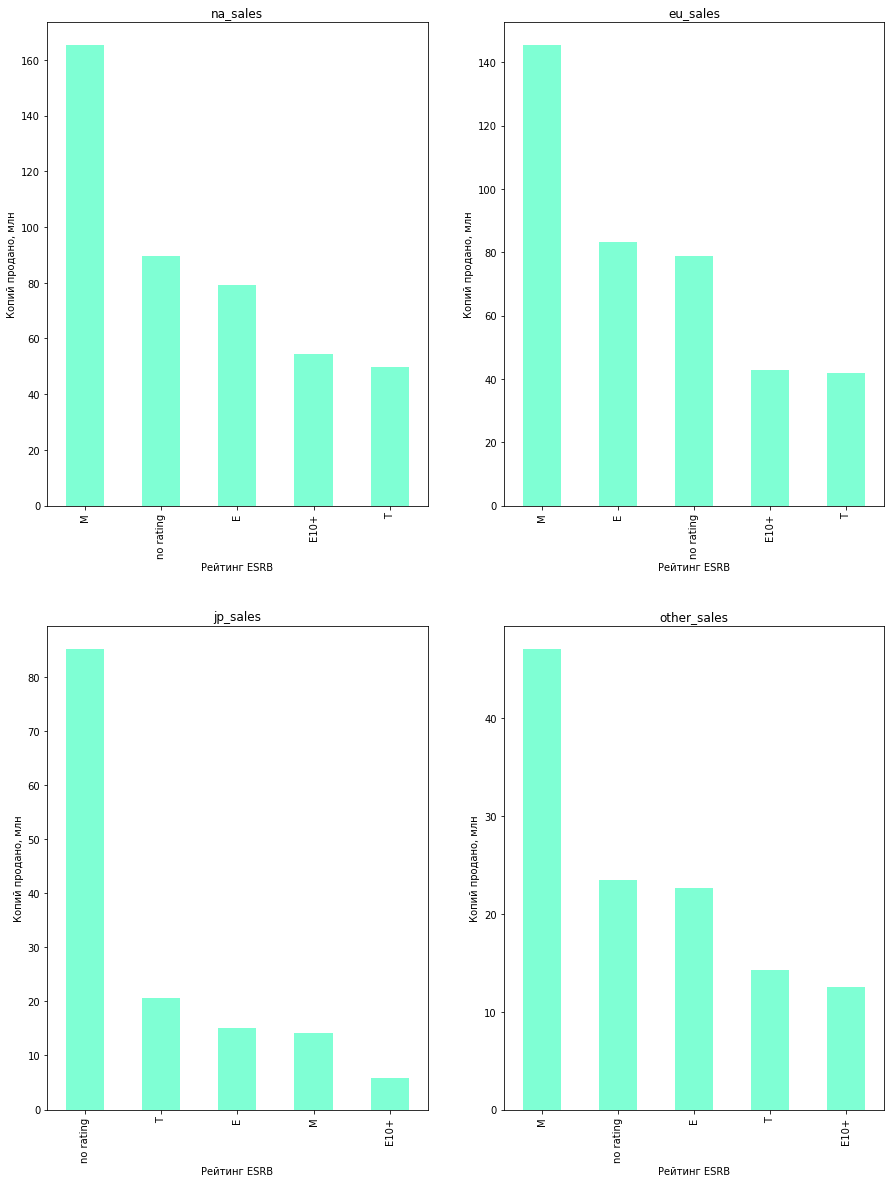

In [51]:
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=.25)

serial_number = 1

for reg in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:    
    ax = plt.subplot(2, 2, serial_number)
    region_rating = actual_data.pivot_table(index='rating', values=reg , aggfunc='sum').sort_values(by=reg, ascending=False)
    region_rating.head().plot(kind='bar', ax=ax, subplots=True, legend=None, color='#7FFFD4')
    plt.xlabel('Рейтинг ESRB')
    plt.ylabel('Копий продано, млн')
    plt.title(reg)
    serial_number += 1

В Северной Америке и Европе лидируют игры, имеющие рейтинг M (Mature - "Для взрослых") - игры для возрастной категории 17+. Следом идут игры с рейтингом E (Everyone - "Для всех"), возрастная категория - 6+.

В Японии рейтинги ESRB слабо влияют на продажи игр - в данном регионе больше всего продаж у игр, не имеющих рейтинга.

__Вывод__

Портрет пользователей в Северной Америке и Европе очень похож:
- пользователи отдают предпочтение игровым приставкам Xbox различных поколений и PS 3 и 4 поколения;
- наиболее популярны среди пользователей игры жанров Action и Shooter;
- больше всего покупают игры возрастной категории 17+ (рейтинг M), также популярны игры категории 6+ (E) и игры без рейтинга.

Портрет пользователя в Японии значительно отличается от портретов западных пользователей:
- пользователи предпочитают приставки и мобильные консоли, выпускаемые японскими компаниями Sony и Nintendo;
- игры жанра Action популярны так же, как и на Западе, но более популярными являются ролевые видеоигры;
- рейтинг ESRB не влияет на продажи игр - в Японии больше всего продаж у игр, не имеющих рейтинга.

### Проверка гипотез

Для проверки гипотез используем метод st.ttest_ind, потому что сравниваем среднее двух независимых совокупностей.

Критический уровень статистической значимости (alpha) = 0.05

__Гипотеза 1__: средние пользовательские рейтинги платформ _Xbox One_ и _PC_ одинаковые.

H_0: Пользовательские рейтинги (user_score) платформы Xbox One = пользовательские рейтинги платформы PC.

H_a: Пользовательские рейтинги (user_score) платформы Xbox One ≠ пользовательские рейтинги платформы PC.

alpha = 0.05

In [52]:
xone = actual_data.query('platform == "XOne" and user_score >= 0')['user_score']
pc = actual_data.query('platform == "PC" and user_score >= 0')['user_score']

alpha = .05

results = st.ttest_ind(xone, pc, equal_var=False)

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463

Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергается. Можно предположить, что у платформ XOne и PC одинаковые или близкие по значению средние пользовательские рейтинги.

__Гипотеза 2__: средние пользовательские рейтинги жанров Action и Sports разные.

H_0: Пользовательские рейтинги (user_score) жанра Action = пользовательские рейтинги жанра Sports.

H_a: Пользовательские рейтинги (user_score) жанра Action ≠ пользовательские рейтинги жанра Sports.

alpha = 0.05

In [53]:
action = actual_data.query('genre == "Action" and user_score >= 0')['user_score']
sports = actual_data.query('genre == "Sports" and user_score >= 0')['user_score']

alpha = .05

results = st.ttest_ind(action, sports, equal_var=False)

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704315e-20

Отвергаем нулевую гипотезу


Нулевая гипотеза отвергается. Можно предположить, что у жанров Action и Sports средние пользовательские рейтинги значительно отличаются.

### Вывод

В ходе исследования:
1. были изучены и обработаны данне: удалены или заполнены пропуски, обработаны дубликаты, преобразованы типы данных, созданы новые необходимые для работы столбцы;
2. проведен исследовательский анализ данных, в результате которого был определен актуальный период, оценены продажи по платформам и жанрам, а также оценена взаимосвязь продаж с оценками критиков и пользователей;
3. составлены портреты пользователей в Северной Америке, Европе и Японии;
4. были провереы гипотезы о равенстве двух различных платформ и двух различных игровых жанров.

В результате исследования было выявлено следующее:
1. Наиболее популярными платформами в 2017 году, вероятнее всего, будут приставки PlayStation 4 и Xbox One. Остаточную популярность будут сохранять PlayStation 3 и мобильные приставки от Nintendo (на территории Японии).
2. Шутеры - в среднем наиболее часто продаваемые и, соответственно, более стабильно приносящие доход игры. При этом, в абсолютном числе продаж лидируют экшн-игры.
3. Игры возрастной категории М (17+) и Е (6+) - наиболее прибыльные.
